In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [61]:
df = pd.read_csv("Customertravel.csv")
df

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0


In [62]:
print("\\nMissing values:\\n", df.isnull().sum())

\nMissing values:\n Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64


In [63]:
label_encoders = {}
for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print(df)

     Age  FrequentFlyer  AnnualIncomeClass  ServicesOpted  \
0     34              0                  2              6   
1     34              2                  1              5   
2     37              0                  2              3   
3     30              0                  2              2   
4     30              0                  1              1   
..   ...            ...                ...            ...   
949   31              2                  1              1   
950   30              0                  2              5   
951   37              0                  2              4   
952   30              0                  1              1   
953   31              2                  0              1   

     AccountSyncedToSocialMedia  BookedHotelOrNot  Target  
0                             0                 1       0  
1                             1                 0       1  
2                             1                 0       0  
3                          

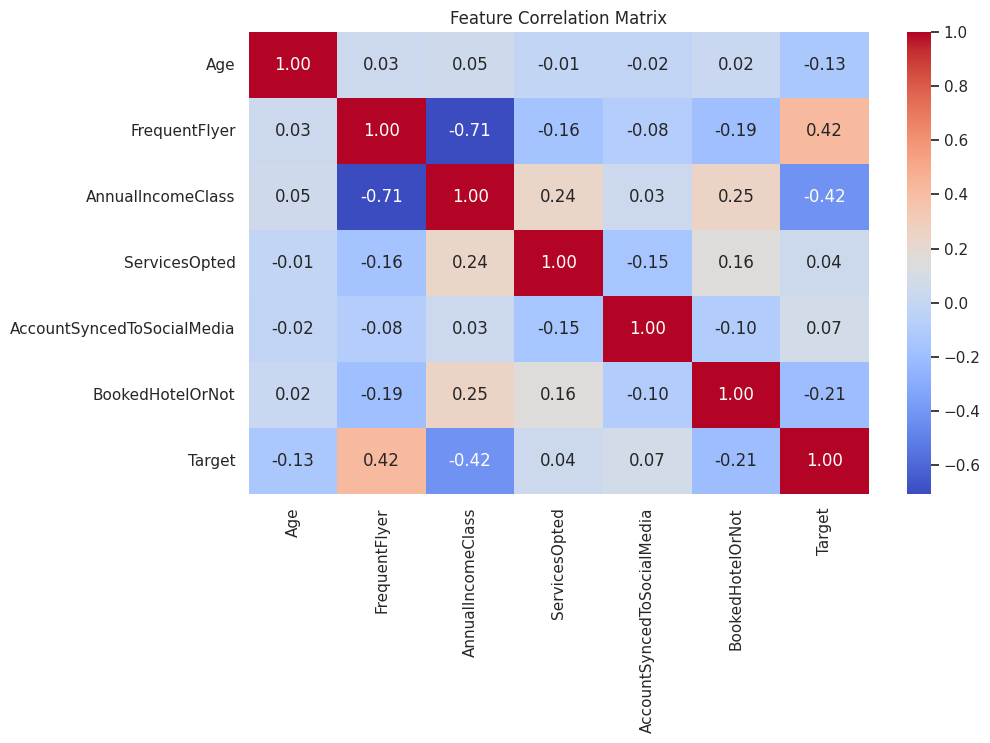

In [64]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

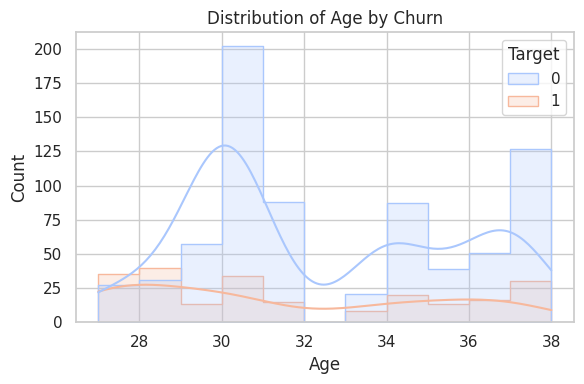

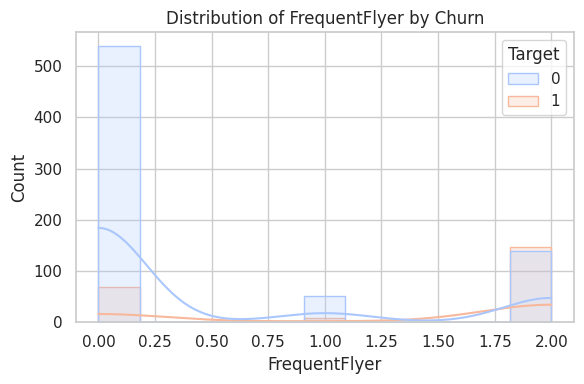

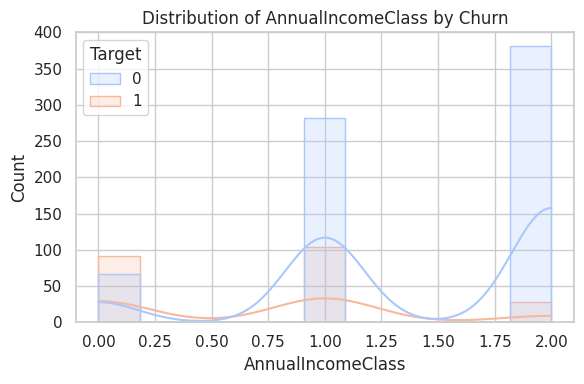

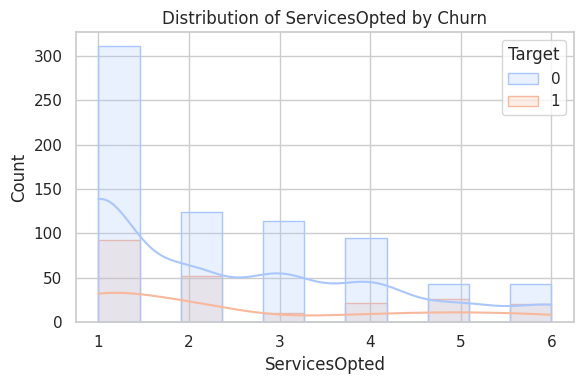

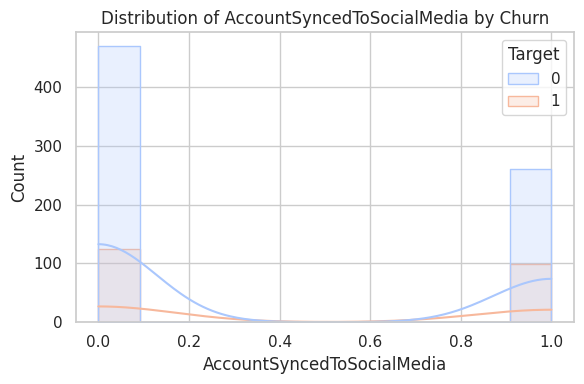

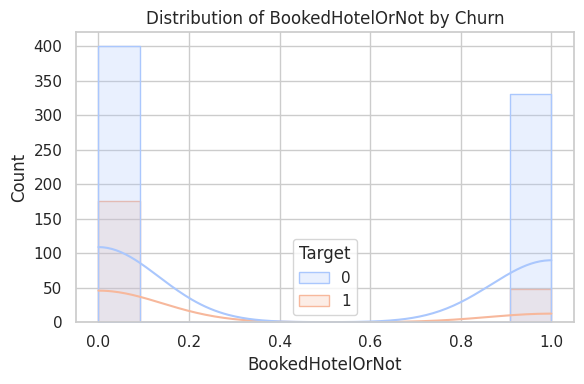

In [65]:

for col in X.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue="Target", kde=True, palette="coolwarm", element="step")
    plt.title(f"Distribution of {col} by Churn")
    plt.tight_layout()
    plt.show()

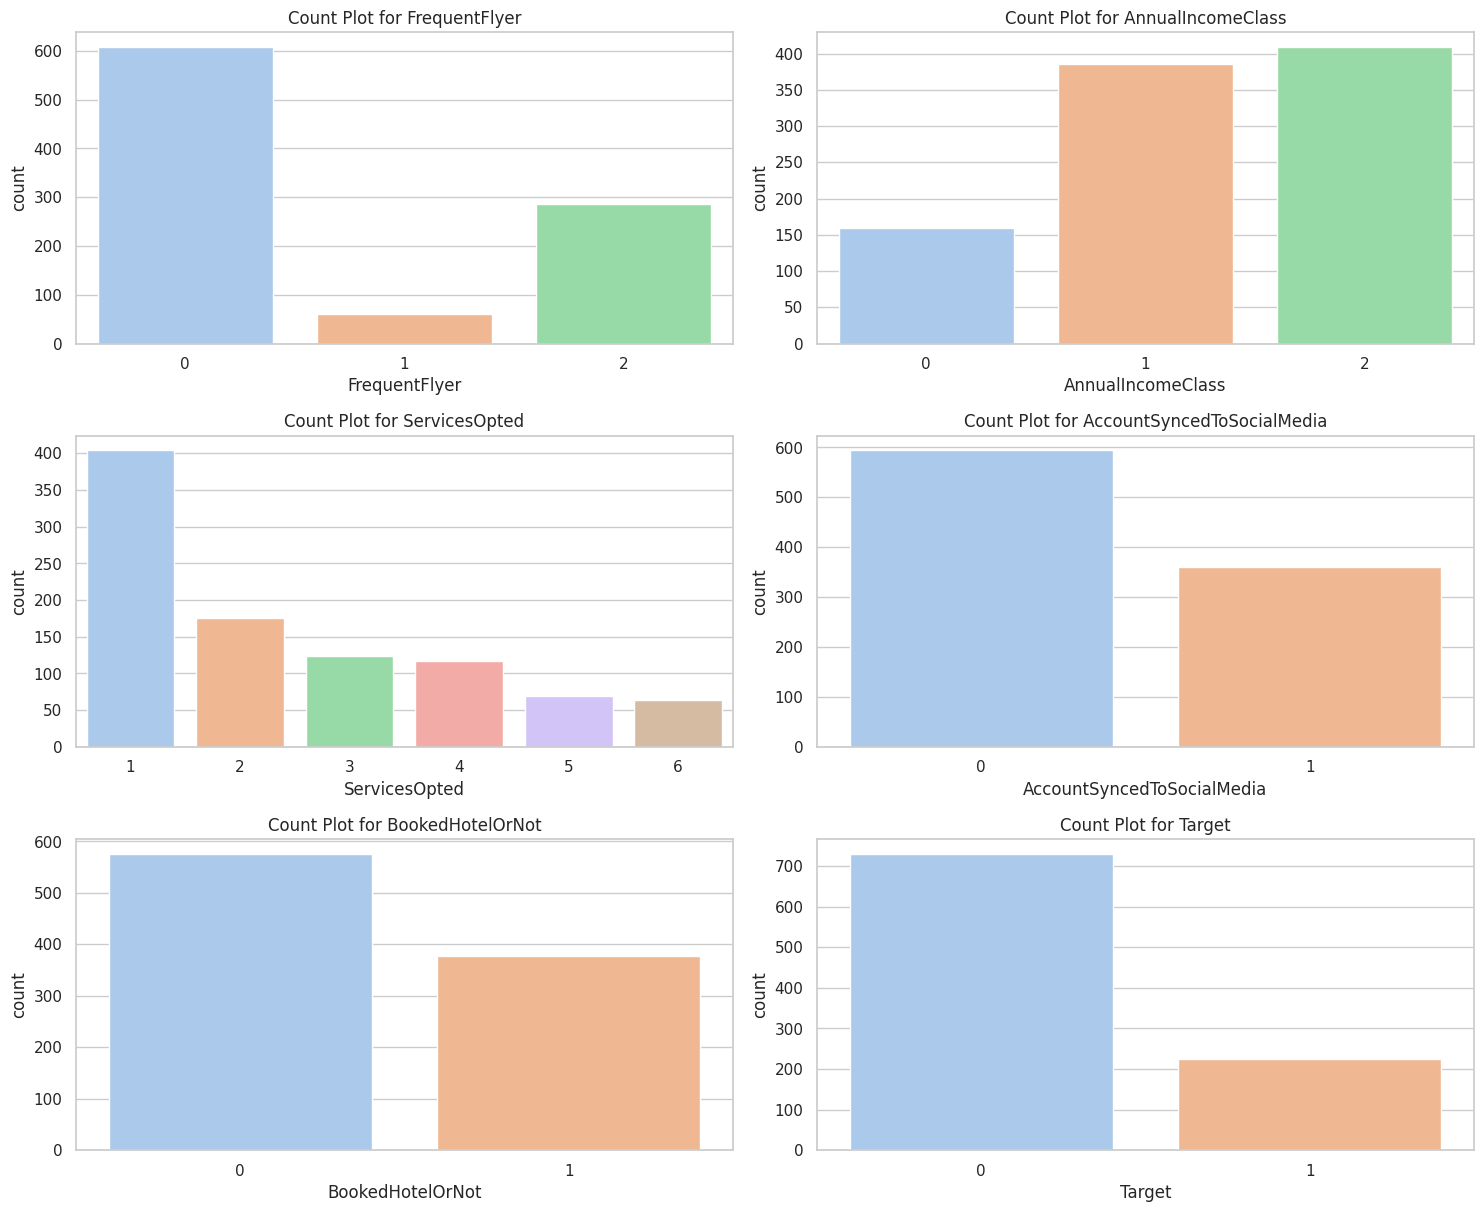

In [72]:
count_col = [col for col in df.columns if df[col].dtype == 'object' or df[col].nunique() <= 10]

plt.figure(figsize=(15, 40))  # Adjust size based on number of plots
plot_num = 1

for col in count_col:
    plt.subplot(10, 2, plot_num)
    sns.countplot(data=df, x=col, palette="pastel")
    plt.title(f"Count Plot for {col}")
    plot_num += 1
    plt.tight_layout()

plt.show()

In [66]:
X = df.drop("Target", axis=1)
y = df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Normalize the training and test data
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train)  # Normalize only the training data
X_test_normalized = normalizer.transform(X_test)  # Apply the same transformation to the test data


\n========== Logistic Regression ==========
Accuracy: 0.8638743455497382
Classification Report:\n               precision    recall  f1-score   support

           0       0.89      0.94      0.92       153
           1       0.70      0.55      0.62        38

    accuracy                           0.86       191
   macro avg       0.80      0.75      0.77       191
weighted avg       0.86      0.86      0.86       191



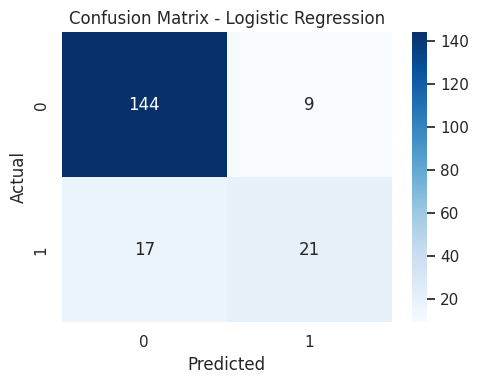

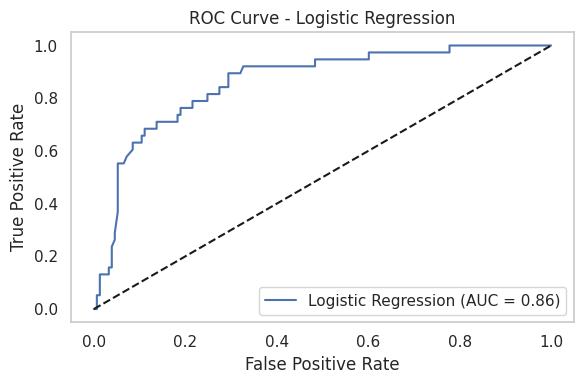

\n========== Support Vector Machine ==========
Accuracy: 0.8481675392670157
Classification Report:\n               precision    recall  f1-score   support

           0       0.90      0.92      0.91       153
           1       0.63      0.58      0.60        38

    accuracy                           0.85       191
   macro avg       0.76      0.75      0.75       191
weighted avg       0.84      0.85      0.85       191



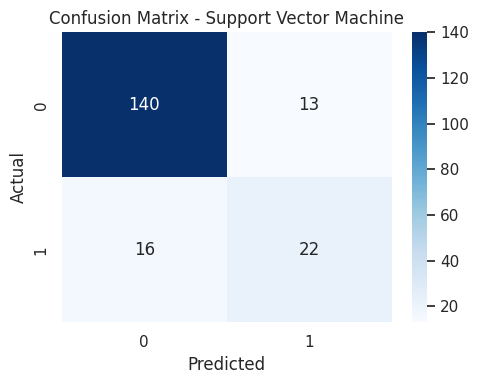

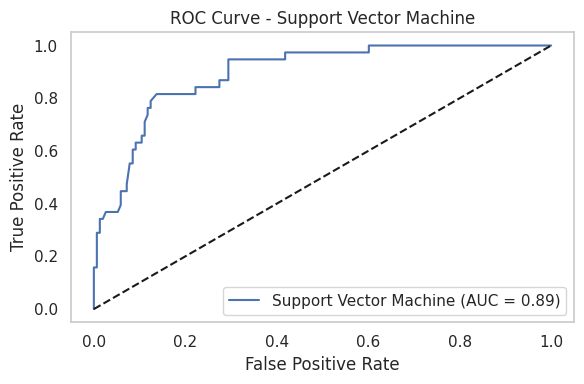

\n========== Decision Tree ==========
Accuracy: 0.900523560209424
Classification Report:\n               precision    recall  f1-score   support

           0       0.92      0.96      0.94       153
           1       0.81      0.66      0.72        38

    accuracy                           0.90       191
   macro avg       0.86      0.81      0.83       191
weighted avg       0.90      0.90      0.90       191



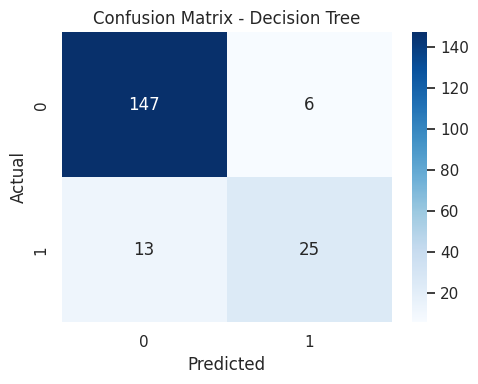

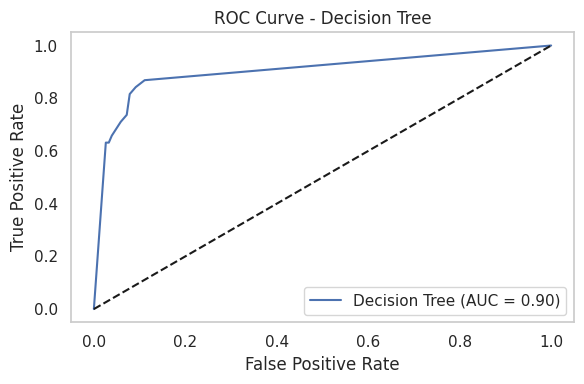

\n========== Random Forest ==========
Accuracy: 0.8743455497382199
Classification Report:\n               precision    recall  f1-score   support

           0       0.91      0.94      0.92       153
           1       0.72      0.61      0.66        38

    accuracy                           0.87       191
   macro avg       0.81      0.77      0.79       191
weighted avg       0.87      0.87      0.87       191



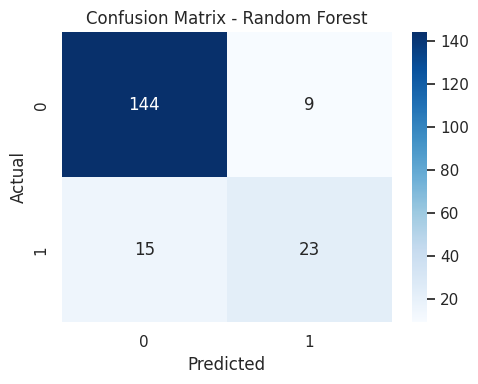

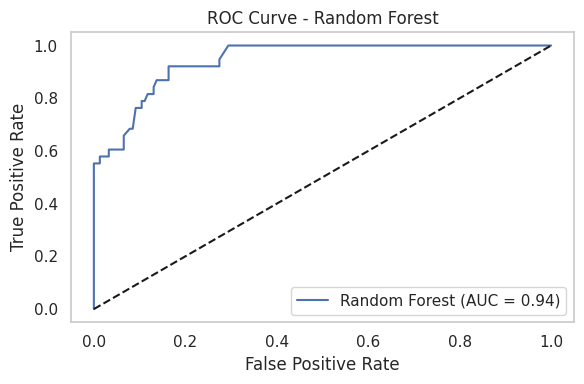

\n========== XGBoost ==========
Accuracy: 0.900523560209424
Classification Report:\n               precision    recall  f1-score   support

           0       0.92      0.96      0.94       153
           1       0.81      0.66      0.72        38

    accuracy                           0.90       191
   macro avg       0.86      0.81      0.83       191
weighted avg       0.90      0.90      0.90       191



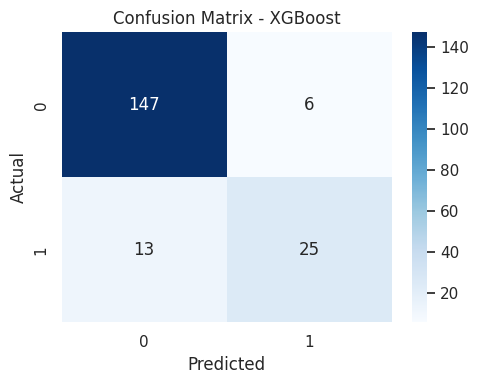

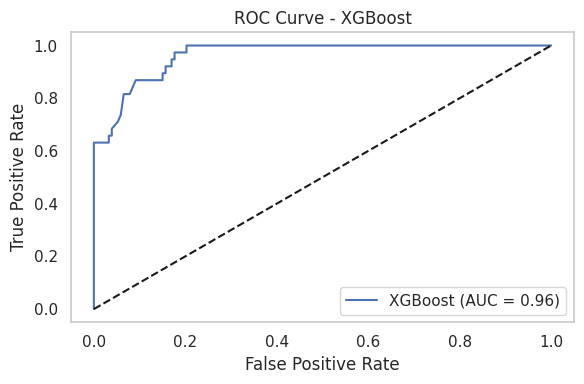

In [67]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}

for name, model in models.items():
    print(f"\\n========== {name} ==========")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    print("Accuracy:", acc)
    print("Classification Report:\\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # ROC Curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc:.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {name}")
        plt.legend(loc="lower right")
        plt.grid()
        plt.tight_layout()
        plt.show()

    results[name] = {"Accuracy": acc, "ROC-AUC": roc}





In [68]:

results_df = pd.DataFrame(results).T.sort_values(by="Accuracy", ascending=False)
print("\\n===== Model Comparison =====")
print(results_df)

\n===== Model Comparison =====
                        Accuracy   ROC-AUC
Decision Tree           0.900524  0.902563
XGBoost                 0.900524  0.963536
Random Forest           0.874346  0.942982
Logistic Regression     0.863874  0.861197
Support Vector Machine  0.848168  0.894049


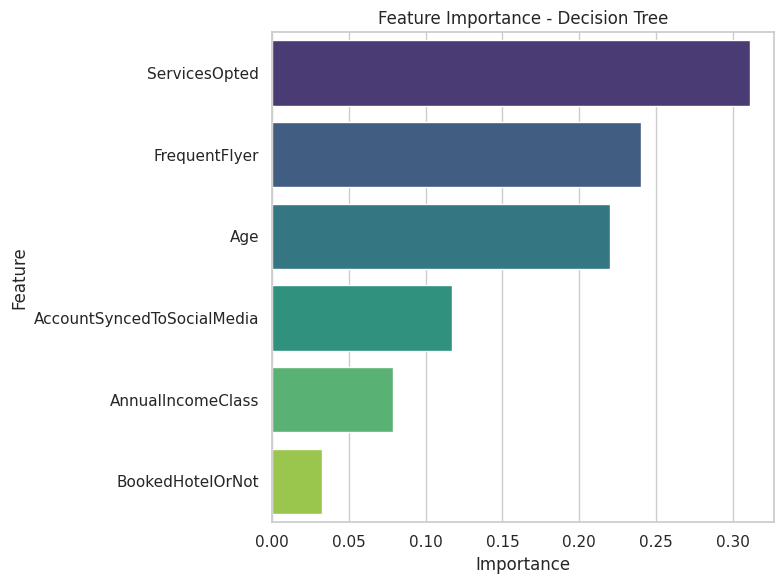

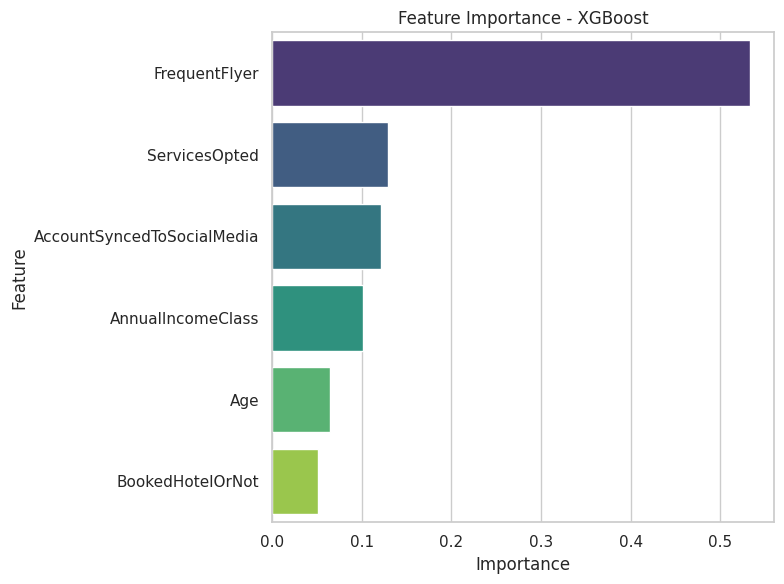

In [71]:

for model_name in ["Decision Tree", "XGBoost"]:
    model = models[model_name]
    importances = model.feature_importances_
    feature_names = X.columns
    importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances}).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(8, 6))
    sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
    plt.title(f"Feature Importance - {model_name}")
    plt.tight_layout()
    plt.show()

In [70]:
import pickle

# Identify the best model based on Accuracy
best_model_name = results_df.index[0]
best_model = models[best_model_name]

# Save the best model to a pickle file
with open(f'{best_model_name.replace(" ", "_")}_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print(f"✅ Best model '{best_model_name}' saved as '{best_model_name.replace(' ', '_')}_model.pkl'")


✅ Best model 'Decision Tree' saved as 'Decision_Tree_model.pkl'
